In [9]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import warnings

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})

# Ignore warnings for clean Output
warnings.filterwarnings("ignore")

In [2]:

# Load Data
# Global electricity production
energy_data = pd.read_csv("../data/electricity-prod-source-stacked.csv")

# CO2 per capita data
co2_data = pd.read_csv("../data/owid-co2-data.csv")

# LCOE data
xls_lcoe = pd.ExcelFile("../data/lcoe-database.xlsx")

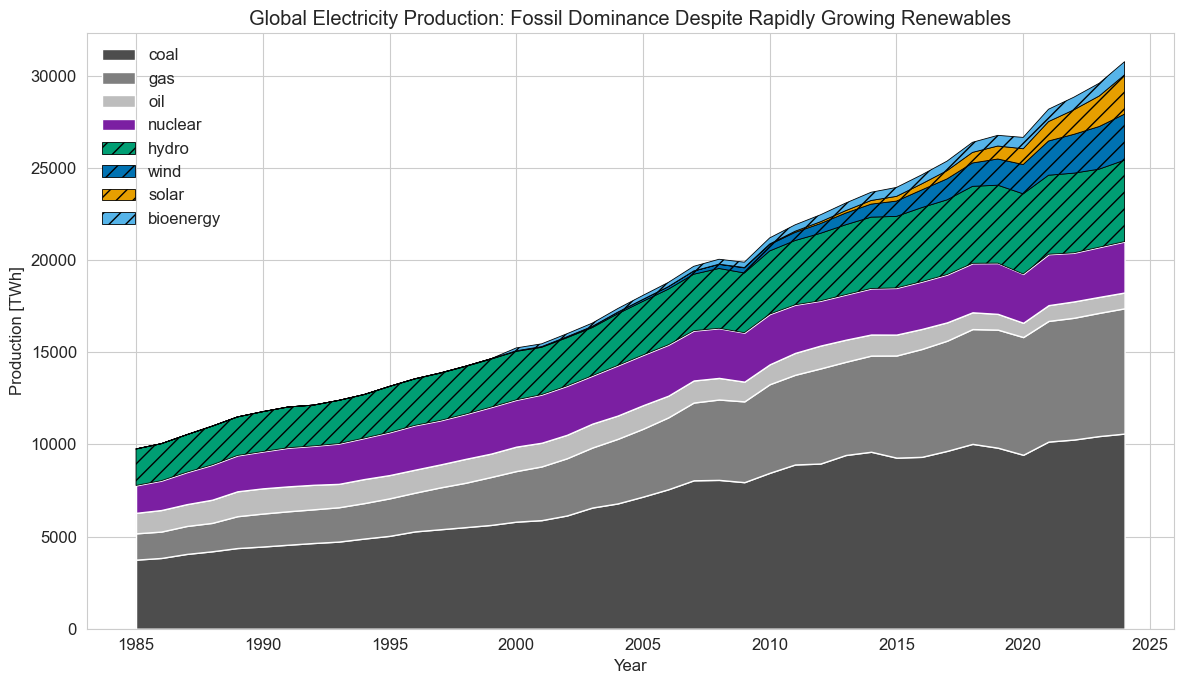

In [3]:
#Stacked Area Chart 
energy_global = energy_data[energy_data['Entity'] == 'World']

energy_columns = [
    "Electricity from coal - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from gas - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from oil - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from nuclear - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from hydro - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from wind - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from solar - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from bioenergy - TWh (adapted for visualization of chart electricity-prod-source-stacked)"
]

colors = [
    "#4d4d4d",  # Coal (dark gray)
    "#7f7f7f",  # Gas (medium gray)
    "#bdbdbd",  # Oil (light gray)
    "#7b1fa2",  # Nuclear (violet)
    "#009e73",  # Hydro (turquoise green, colorblind safe)
    "#0072b2",  # Wind (blue, colorblind safe)
    "#e69f00",  # Solar (orange, colorblind safe)
    "#56b4e9"   # Bioenergy (light blue, colorblind safe)
]

plt.figure(figsize=(12, 7))
collections = plt.stackplot(
    energy_global['Year'],
    [energy_global[col] for col in energy_columns],
    labels=[col.split(' - ')[0].replace("Electricity from ", "") for col in energy_columns],
    colors=colors
)

# Add hatching to renewables (Hydro, Wind, Solar, Bioenergy)
renewable_indices = [4, 5, 6, 7]

for i in renewable_indices:
    collections[i].set_hatch('//')
    collections[i].set_edgecolor('black')
    collections[i].set_linewidth(0.6)



plt.legend(loc='upper left', frameon=False)
plt.title("Global Electricity Production: Fossil Dominance Despite Rapidly Growing Renewables")
plt.xlabel("Year")
plt.ylabel("Production [TWh]")
plt.tight_layout()
plt.show()


C:\Users\Nico\AppData\Local\Temp\ipykernel_20976\548820766.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_global['Renewables'] = energy_global[renewables_cols].sum(axis=1)
C:\Users\Nico\AppData\Local\Temp\ipykernel_20976\548820766.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_global['Fossil Fuels'] = energy_global[fossil_cols].sum(axis=1)


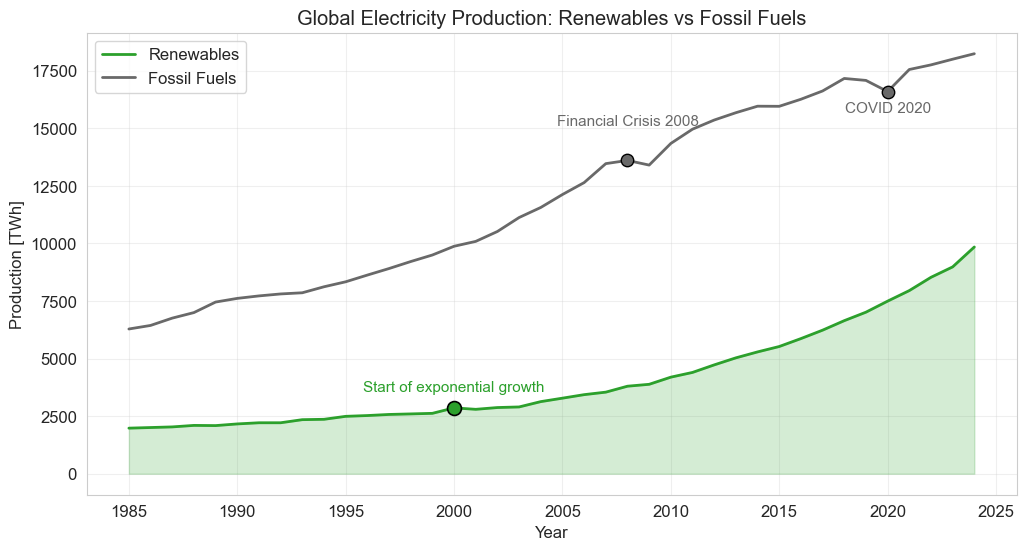

In [4]:

# Renewables vs Fossil Fuels

renewables_cols = [
    "Other renewables excluding bioenergy - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from bioenergy - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from solar - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from wind - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from hydro - TWh (adapted for visualization of chart electricity-prod-source-stacked)"
]

fossil_cols = [
    "Electricity from oil - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from gas - TWh (adapted for visualization of chart electricity-prod-source-stacked)",
    "Electricity from coal - TWh (adapted for visualization of chart electricity-prod-source-stacked)"
]

# Sum per group
energy_global['Renewables'] = energy_global[renewables_cols].sum(axis=1)
energy_global['Fossil Fuels'] = energy_global[fossil_cols].sum(axis=1)

plt.figure(figsize=(12,6))
plt.plot(energy_global['Year'], energy_global['Renewables'], label='Renewables', color='#2ca02c', linewidth=2)
plt.plot(energy_global['Year'], energy_global['Fossil Fuels'], label='Fossil Fuels', color='dimgray', linewidth=2)
plt.fill_between(energy_global['Year'], 0, energy_global['Renewables'], color='#2ca02c', alpha=0.2)

# Marker & annotation for Renewables
year_annot_ren = 2000
renewables_value = energy_global.loc[energy_global['Year'] == year_annot_ren, 'Renewables'].values[0]
plt.scatter(year_annot_ren, renewables_value, color='#2ca02c', s=100, edgecolor='black', linewidth=1.2, zorder=5)
plt.annotate("Start of exponential growth",
             xy=(year_annot_ren, renewables_value),
             xytext=(year_annot_ren, renewables_value + 700),
             ha='center', arrowprops=dict(facecolor='black', arrowstyle="->"),
             fontsize=11, color='#2ca02c')

# Marker & annotation for Fossil Fuels
annotations_fossil = {2008: "Financial Crisis 2008", 2020: "COVID 2020"}
for year, label in annotations_fossil.items():
    value = energy_global.loc[energy_global['Year'] == year, 'Fossil Fuels'].values[0]
    plt.scatter(year, value, color='dimgray', s=80, edgecolor='black', linewidth=1, zorder=5)
    offset = 1500 if year == 2008 else -900
    plt.annotate(label, xy=(year, value), xytext=(year, value + offset),
                 ha='center', arrowprops=dict(facecolor='black', arrowstyle="->"),
                 fontsize=11, color='dimgray')

plt.title("Global Electricity Production: Renewables vs Fossil Fuels")
plt.xlabel("Year")
plt.ylabel("Production [TWh]")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


C:\Users\Nico\AppData\Local\Temp\ipykernel_20976\2500691348.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_global['Total_TWh'] = energy_global['Renewables'] + energy_global['Fossil Fuels']
C:\Users\Nico\AppData\Local\Temp\ipykernel_20976\2500691348.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_global['Renewable_Share'] = energy_global['Renewables'] / energy_global['Total_TWh'] * 100


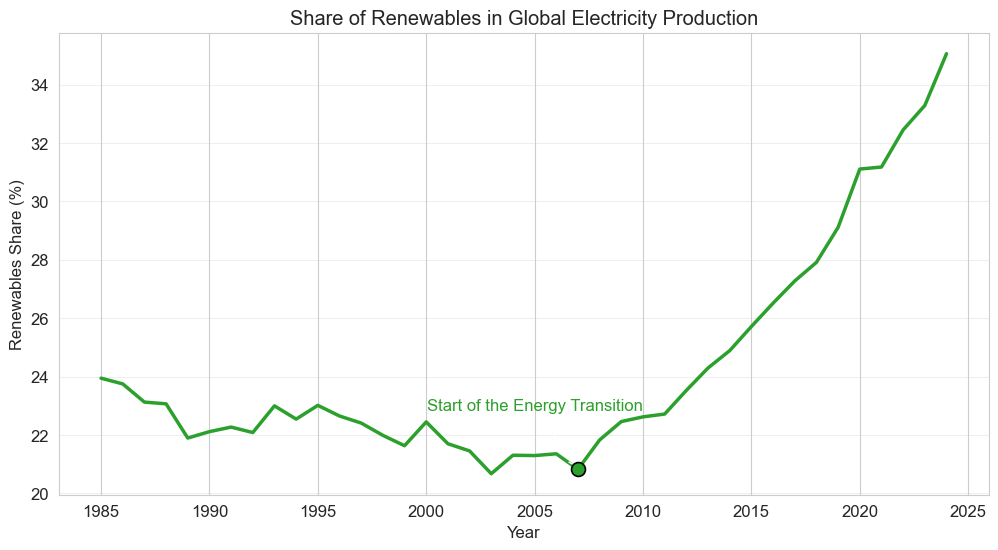

In [5]:

# Share of Renewables

energy_global['Total_TWh'] = energy_global['Renewables'] + energy_global['Fossil Fuels']
energy_global['Renewable_Share'] = energy_global['Renewables'] / energy_global['Total_TWh'] * 100

plt.figure(figsize=(12,6))
plt.plot(energy_global['Year'], energy_global['Renewable_Share'], color='#2ca02c', linewidth=2.5)

# Annotation at 2007
year_annot = 2007
value = energy_global.loc[energy_global['Year'] == year_annot, 'Renewable_Share'].values[0]
plt.scatter(year_annot, value, color='#2ca02c', s=100, edgecolor='black', linewidth=1.2, zorder=5)
plt.annotate("Start of the Energy Transition", xy=(year_annot, value), xytext=(year_annot-2, value+2),
             ha='center', arrowprops=dict(facecolor='black', arrowstyle="->"),
             fontsize=12, color='#2ca02c')

plt.title("Share of Renewables in Global Electricity Production")
plt.xlabel("Year")
plt.ylabel("Renewables Share (%)")
plt.grid(axis='y', alpha=0.3)
plt.show()


C:\Users\Nico\AppData\Local\Temp\ipykernel_20976\3687474380.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='LCOE', y='Technology', data=df_lcoe, order=sorted_techs, palette=palette, showfliers=False)


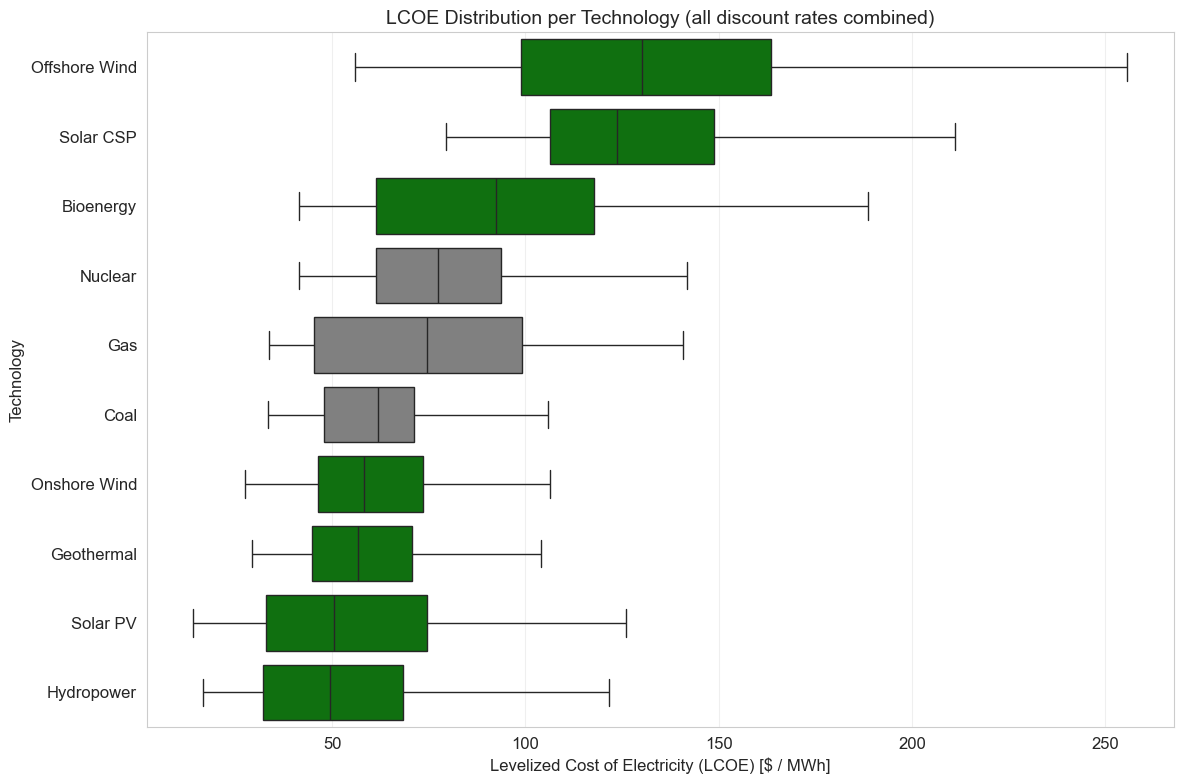

In [6]:

# LCOE Distribution per Technology

# Load all tabs except "Introduction"
tabs = [tab for tab in xls_lcoe.sheet_names if tab.lower() != "introduction"]

lcoe_values = {}
for tab in tabs:
    tech_code = tab.split('-')[0]
    df = pd.read_excel(xls_lcoe, sheet_name=tab, skiprows=4)
    values = df.iloc[:, -1].dropna().values
    if tech_code in lcoe_values:
        lcoe_values[tech_code] += list(values)
    else:
        lcoe_values[tech_code] = list(values)

# Combine GT and CC as Gas
gas_values = []
for code in ['GT','CC']:
    if code in lcoe_values:
        gas_values += lcoe_values.pop(code)
lcoe_values['GAS'] = gas_values

# Map to readable names
tech_labels = {
    'PV':'Solar PV','CSP':'Solar CSP','WON':'Onshore Wind','WOF':'Offshore Wind',
    'HYD':'Hydropower','BIO':'Bioenergy','GEO':'Geothermal',
    'COL':'Coal','GAS':'Gas','OIL':'Oil','NUC':'Nuclear'
}

data_lcoe = []
for tech_code, values in lcoe_values.items():
    label = tech_labels.get(tech_code, tech_code)
    for v in values:
        data_lcoe.append({'Technology': label, 'LCOE': v})
df_lcoe = pd.DataFrame(data_lcoe)

# Sort by median LCOE
medians = df_lcoe.groupby('Technology')['LCOE'].median().sort_values(ascending=False)
sorted_techs = medians.index.tolist()

# Define colors
renewables = ['Solar PV','Solar CSP','Onshore Wind','Offshore Wind','Hydropower','Bioenergy','Geothermal']
palette = ['green' if tech in renewables else 'gray' for tech in sorted_techs]

# Plot
plt.figure(figsize=(12,8))
sns.boxplot(x='LCOE', y='Technology', data=df_lcoe, order=sorted_techs, palette=palette, showfliers=False)
plt.xlabel("Levelized Cost of Electricity (LCOE) [$ / MWh]", fontsize=12)
plt.ylabel("Technology", fontsize=12)
plt.title("LCOE Distribution per Technology (all discount rates combined)", fontsize=14)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


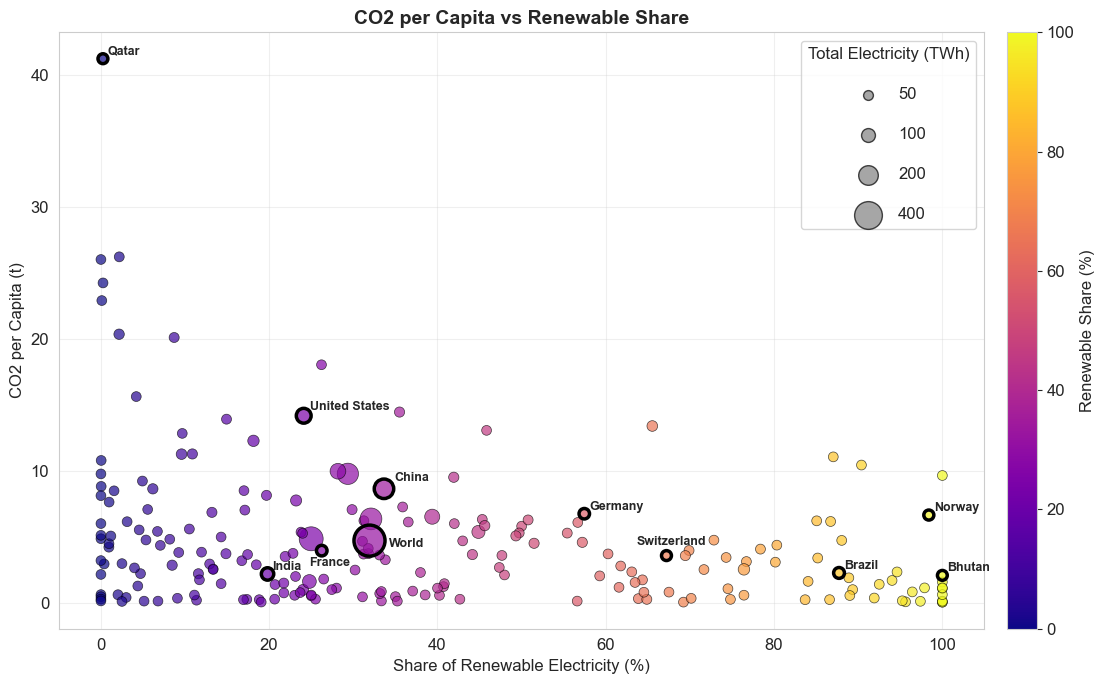

In [7]:
#Scatter Plot Co2 per Capita vs share of renewables

# Calculate total electricity per country
all_energy_cols = energy_data.columns[3:]  # all columns from 4th onward
energy_data['Total_TWh'] = energy_data[all_energy_cols].sum(axis=1)

# Calculate share of renewables
energy_data.loc[:, 'Renewable_Share'] = energy_data[renewables_cols].sum(axis=1) / energy_data['Total_TWh'] * 100

# Filter latest year per country
latest_year = energy_data.groupby('Entity')['Year'].transform('max')
latest_energy = energy_data[energy_data['Year'] == latest_year].copy()

# Filter latest CO2 per capita per country
latest_year_co2 = co2_data.groupby('country')['year'].transform('max')
latest_co2 = co2_data[co2_data['year'] == latest_year_co2][['country', 'co2_per_capita']]

# Merge energy and CO2 data
merged = pd.merge(latest_energy, latest_co2, left_on='Entity', right_on='country', how='inner')

# Create scatter plot
plt.figure(figsize=(12,7))
ax = sns.scatterplot(
    data=merged,
    x='Renewable_Share',
    y='co2_per_capita',
    size='Total_TWh',
    hue='Renewable_Share',
    palette='plasma',
    alpha=0.7,
    sizes=(50, 500),
    edgecolor='k',
    linewidth=0.5,
    legend=False
)

# Set axes limits with buffer
x_min, x_max = merged['Renewable_Share'].min(), merged['Renewable_Share'].max()
y_min, y_max = merged['co2_per_capita'].min(), merged['co2_per_capita'].max()
plt.xlim(x_min - 5, x_max + 5)
plt.ylim(y_min - 2, y_max + 2)

# Set axis labels and title
plt.xlabel("Share of Renewable Electricity (%)", fontsize=12)
plt.ylabel("CO2 per Capita (t)", fontsize=12)
plt.title("CO2 per Capita vs Renewable Share", fontsize=14, weight='bold')

# Add colorbar for Renewable Share
norm = mpl.colors.Normalize(vmin=x_min, vmax=x_max)
sm = mpl.cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Renewable Share (%)', fontsize=12)

# Add size legend for total electricity
size_legend = [50, 100, 200, 400]
handles = [
    plt.scatter([], [], s=s, color='gray', alpha=0.7, edgecolors='k', linewidth=1)
    for s in size_legend
]
plt.legend(
    handles,
    [str(s) for s in size_legend],
    title='Total Electricity (TWh)',
    frameon=True,
    labelspacing=1.5,
    loc='upper right'
)

# Highlight and label selected countries
highlight_countries = [
    'Switzerland', 'Germany', 'United States',
    'China', 'France', 'Brazil', 'India',
    'Qatar', 'Norway', 'World', 'Bhutan'
]

# Define text offsets for labels
label_offsets = {
    'China': (1.2, 0.6),
    'United States': (0.8, 0.4),
    'World': (2.3, -0.5),
    'France': (-1.5, -1.2),
    'Switzerland': (-3.5, 0.8)
}

# Scale marker sizes
min_size, max_size = 50, 500
twh_min, twh_max = merged['Total_TWh'].min(), merged['Total_TWh'].max()

def scale_size(twh):
    return min_size + (twh - twh_min) / (twh_max - twh_min) * (max_size - min_size)

# Draw highlighted markers and labels
for _, row in merged.iterrows():
    if row['Entity'] in highlight_countries:
        # Draw marker outline
        ax.scatter(
            row['Renewable_Share'],
            row['co2_per_capita'],
            s=scale_size(row['Total_TWh']),
            facecolors='none',
            edgecolors='black',
            linewidth=2.5,
            zorder=3
        )

        # Apply label offset if defined
        dx, dy = label_offsets.get(row['Entity'], (0.6, 0.3))
        ax.text(
            row['Renewable_Share'] + dx,
            row['co2_per_capita'] + dy,
            row['Entity'],
            fontsize=9,
            weight='bold'
        )

# Final layout adjustments
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
